<h4>Phân tích</h4>

Thuật toán ORB (<b>Oriented FAST</b> and <b>Rotated BRIEF</b>) là một thuật toán dùng để phát hiện và mô tả các đặc trưng trong ảnh, ORB kết hợp hai thuật toán FAST (Features from Accelerated Segment Test) và BRIEF (Binary Robust Independent Elementary Features).

<h5>Oriented FAST</h5>

Thuật toán FAST chỉ thực hiện phát hiện các keypoints dựa vào cường độ sáng bằng cách so sánh với các điểm trong vùng lân cận mà thiếu đi việc xác định hướng của keypoints như SIFT, SURF thực hiện. Để làm cho các điểm đặc trưng có hướng, thuật toán ORB sử dụng thước đo góc của Harris (Harris Corner Measure) để xác định mức độ "corner" của mỗi điểm đặc trưng. Sau đó, góc gradient xung quanh điểm đặc trưng được tính toán để xác định hướng chính xác của nó.

Chi tiết việc sử dụng thước đo Harris Corner Measure để xác định hướng cho một keypoint được thực hiện như sau:

Tương tự với thuật toán Harris Corner Detector, ta xây dựng được ma trận M theo công thức sau: <br>
$\mathrm{M} =  \displaystyle\sum_{x,y}^{} \mathrm{w}(x,y)\begin{bmatrix}\ \mathrm{I_x^2}(x,y) & \ \mathrm{I_{xy}}(x,y)\\\ \mathrm{I_{xy}}(x,y) & \mathrm{I_y^2}(x,y) \\\end{bmatrix}$

Tính toán ma trận độ nhạy của Harris 𝐻. Sau khi có ma trận 𝑀, ta tính toán ma trận độ nhạy của Harris 𝐻, một số lượng dùng để xác định mức độ "corner" của mỗi điểm ảnh. Ma trận Harris là một phép tích chập của 𝑀 với một hàm Gauss để làm nổi bật các điểm sắc nét trong ảnh. <br>
$H = \begin{bmatrix}H_{11} & H_{12}\\H_{12} & H_{22}\end{bmatrix} = \begin{bmatrix}\ \mathrm{I_x^2} & \ \mathrm{I_{xy}}\\\ \mathrm{I_{xy}} & \mathrm{I_y^2} \\\end{bmatrix}* G_{\sigma }$

Trong đó $G_{\sigma }$ là ma trận Gauss với độ nhạy 𝜎, và ∗ biểu thị phép tích chập.

Tính toán góc gradient 𝜃: Góc gradient 𝜃 tại mỗi điểm được tính bằng cách lấy giá trị của ma trận 𝐻: <br>
$\theta = \frac{1}{2}tan^{-1}(\frac{2H_{12}}{H_{22} - H_{11}})$

Đây là công thức tính góc gradient từ ma trận Harris, giúp xác định hướng chính xác của gradient tại điểm đặc trưng.

<h5>Rotated BRIEF</h5>

Một vấn đề của BRIEF là nó không bất biến với xoay. Để giải quyết vấn đề này, ORB thực hiện xoay vector BRIEF theo hướng của điểm đặc trưng đã tính toán ở bước Oriented FAST. Điều này giúp ORB trở nên bất biến với các phép biến đổi xoay.

ORB rời rạc hóa góc theo gia số  2$\pi$/360 (12 độ) và xây dựng bảng tra cứu các mẫu BRIEF được tính toán trước.  Mỗi vector BRIEF được xoay một góc tương ứng với hướng của keypoint. Quá trình xoay được thực hiện bằng cách đảo bit trong vector BRIEF theo một cách xác định để đảm bảo tính bất biến với xoay. Quy tắc đảo bit được thực hiện dựa theo bảng tra cứu mẫu BRIEF. 

Lấy ví dụ, góc $\theta = 24^{ \bullet }$ thì sẽ cần thực hiện xoay vector BRIEF hai bước. <br>

Chẳng hạn bảng tra cứu mẫu BRIEF có giá trị như sau:<br>
Bước 0: $0\rightarrow 2, 1\rightarrow 4, 2\rightarrow 3, 3\rightarrow 1, 4\rightarrow 0 ...$<br>
Bước 1:$0\rightarrow 3, 1\rightarrow 0, 2\rightarrow 1, 3\rightarrow 4, 4\rightarrow 2 ...$<br>

Khi đó, vector BRIEF ban đầu [1, 0, 1, 1, 0, ...]. Sau khi thực hiện bước 0 thì vị trí đảo bit thành [2,4,3,1,0..], sau khi thực hiện bước 1 thì vị trí đảo bit thành [1,2,4,0,3..] => vector BRIEF sau khi xoay hai bước là [0,1,0,1,1..]


<h4>ORB trong OpenCV</h4>

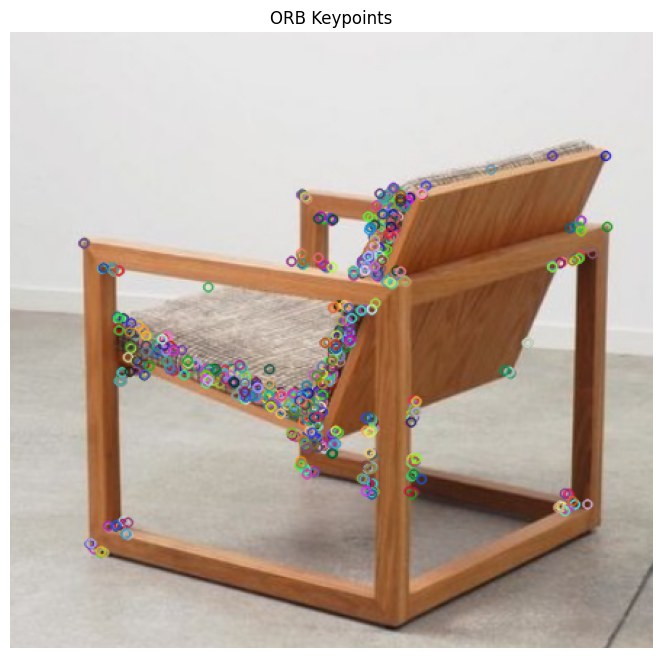

Number of keypoints detected: 930


In [2]:
# Hàm cv2.ORB_create() có chứa các tham số sau:
# nfeatures: Số lượng điểm đặc trưng tối đa mà ORB sẽ tìm kiếm. Mặc định là 500
# WTA_K: Số lượng bit mà ORB sử dụng để tạo mô tả từ các phép so sánh cặp điểm. Có thể là 2, 3 hoặc 4. Mặc định là 2
# scoreType: Phương pháp tính điểm để sắp xếp các điểm đặc trưng. Có thể là cv2.ORB_HARRIS_SCORE hoặc cv2.ORB_FAST_SCORE. 
#            Mặc định là cv2.ORB_HARRIS_SCORE

import cv2
import matplotlib.pyplot as plt

# Đọc ảnh đầu vào
image = cv2.imread('sift.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Khởi tạo đối tượng ORB
orb = cv2.ORB_create(nfeatures=1000)

# Tìm điểm đặc trưng và mô tả với ORB
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Vẽ các điểm đặc trưng lên ảnh
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Hiển thị ảnh với các điểm đặc trưng sử dụng matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints')
plt.axis('off')
plt.show()

# In ra số lượng điểm đặc trưng được tìm thấy
print(f"Number of keypoints detected: {len(keypoints)}")